In [2]:
import yfinance as yf, numpy as np, datetime as dt,matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
tickers=['GOF','CCD','DX','USA','ARCC']
weights=np.array([0.3,0.3,0.1,0.1,0.2])

In [5]:
start=dt.datetime(2019,1,1)
end=dt.datetime.now()
# notice how the now function can come into handy
df=yf.download('GOF',start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,18.209999,19.090000,18.139999,18.870001,11.846918,354700
2019-01-03,18.930000,19.150000,18.660000,18.860001,11.840632,179200
2019-01-04,19.020000,19.049999,18.700001,18.820000,11.815523,278200
2019-01-07,18.850000,19.340000,18.850000,19.299999,12.116874,214500
2019-01-08,19.510000,19.639999,19.340000,19.490000,12.236158,194700
...,...,...,...,...,...,...
2022-12-16,15.950000,15.980000,15.800000,15.900000,15.900000,605800
2022-12-19,15.920000,15.920000,15.660000,15.740000,15.740000,762400
2022-12-20,15.660000,15.720000,15.520000,15.610000,15.610000,650800


In [7]:
# to having the df for portfolio
# we can do as below:
dfall=yf.download(tickers,start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [8]:
dfall

,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,10.592238,11.867771,11.536770,11.846917,3.612476
2019-01-03,10.448638,11.783597,11.714561,11.840635,3.545328
2019-01-04,10.776867,12.092220,11.931864,11.815523,3.612476
2019-01-07,11.002526,12.477990,12.149167,12.116876,3.706480
2019-01-08,11.214507,12.590217,12.168919,12.236160,3.766912
...,...,...,...,...,...
2022-12-16,18.360001,20.980000,12.820400,15.900000,5.880000
2022-12-19,17.980000,20.700001,12.909500,15.740000,5.820000
2022-12-20,18.379999,20.830000,12.959000,15.610000,5.810000


In [12]:
returns=dfall.pct_change() # build in function or dir

In [13]:
returns # here is the daily return by defult 

,ARCC,CCD,DX,GOF,USA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.013557,-0.007093,0.015411,-0.000530,-0.018588
2019-01-04,0.031414,0.026191,0.018550,-0.002121,0.018940
2019-01-07,0.020939,0.031902,0.018212,0.025505,0.026022
2019-01-08,0.019267,0.008994,0.001626,0.009845,0.016304
...,...,...,...,...,...
2022-12-16,-0.012903,-0.008038,-0.018939,-0.005629,-0.013423
2022-12-19,-0.020697,-0.013346,0.006950,-0.010063,-0.010204
2022-12-20,0.022247,0.006280,0.003834,-0.008259,-0.001718


In [14]:
#HERE to calculate coveriance matrix
cov_matrix=returns.cov()
cov_matrix

,ARCC,CCD,DX,GOF,USA
ARCC,0.000497,0.000338,0.000283,0.000205,0.000301
CCD,0.000338,0.000487,0.000302,0.000233,0.000320
DX,0.000283,0.000302,0.000658,0.000157,0.000263
GOF,0.000205,0.000233,0.000157,0.000228,0.000174
USA,0.000301,0.000320,0.000263,0.000174,0.000365


In [15]:
avg_returns=returns.mean()
avg_returns

ARCC    0.000793
CCD     0.000807
DX      0.000438
GOF     0.000395
USA     0.000661
dtype: float64

In [16]:
count=returns.count()
count

ARCC    1002
CCD     1002
DX      1002
GOF     1002
USA     1002
dtype: int64

In [17]:
count[0]

1002

In [21]:
#note here we use @ to assign the weight
portfolio_mean=avg_returns@weights
portfolio_std=np.sqrt(weights.T@ cov_matrix@weights)

In [22]:
# note here is the calculated daily return
portfolio_mean

0.0006954919301130848

In [24]:
portfolio_std

0.018148685256449366

In [26]:
# note arrange give even interval good for x aixes
x=np.arange(-0.05,0.05,0.001)
x

array([-5.00000000e-02, -4.90000000e-02, -4.80000000e-02, -4.70000000e-02,
       -4.60000000e-02, -4.50000000e-02, -4.40000000e-02, -4.30000000e-02,
       -4.20000000e-02, -4.10000000e-02, -4.00000000e-02, -3.90000000e-02,
       -3.80000000e-02, -3.70000000e-02, -3.60000000e-02, -3.50000000e-02,
       -3.40000000e-02, -3.30000000e-02, -3.20000000e-02, -3.10000000e-02,
       -3.00000000e-02, -2.90000000e-02, -2.80000000e-02, -2.70000000e-02,
       -2.60000000e-02, -2.50000000e-02, -2.40000000e-02, -2.30000000e-02,
       -2.20000000e-02, -2.10000000e-02, -2.00000000e-02, -1.90000000e-02,
       -1.80000000e-02, -1.70000000e-02, -1.60000000e-02, -1.50000000e-02,
       -1.40000000e-02, -1.30000000e-02, -1.20000000e-02, -1.10000000e-02,
       -1.00000000e-02, -9.00000000e-03, -8.00000000e-03, -7.00000000e-03,
       -6.00000000e-03, -5.00000000e-03, -4.00000000e-03, -3.00000000e-03,
       -2.00000000e-03, -1.00000000e-03,  4.16333634e-17,  1.00000000e-03,
        2.00000000e-03,  

In [28]:
#pdf probability density function
norm_dist=norm.pdf(x,portfolio_mean,portfolio_std)

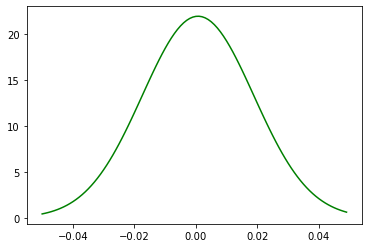

In [29]:
plt.plot(x,norm_dist,c='g')

In [30]:
#percentage function
confidence_lv=0.05
Var=norm.ppf(confidence_lv,portfolio_mean,portfolio_std)
Var

-0.02915643883835838

In [32]:
# to see var for a period time eg a month 
num_days=21 # assume 21 trading days in a month 
period_var=Var*np.sqrt(num_days) # note here has to be sqrt
period_var

-0.13361158797212758

In [33]:
# calculate the range with confidence interval
lower=portfolio_mean-2*portfolio_std/np.sqrt(count[0])
higher=portfolio_mean+2*portfolio_std/np.sqrt(count[0])

In [34]:
lower

-0.0004511856040768107

In [35]:
higher

0.0018421694643029802

#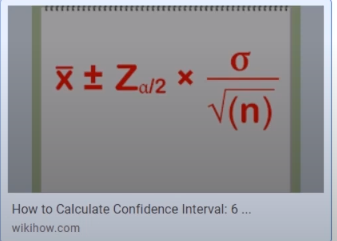

In [ ]:
#refer above fo confidence interval